In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import statistics as stat

dataframe = pd.read_stata('dataset.dta')
#dataframe.to_csv('dta_to_csv_file.csv')
pd.io.stata.StataReader('dataset.dta').variable_labels()

{'id': 'identification number',
 'ost': 'east/west at draw',
 'branche': 'share in 22 ecnomic sectors',
 'filter': 'innovator filter',
 'gruend': 'Start-ups',
 'zusamm': 'merger',
 'zusamm10': 'increase in sales because of merger',
 'geschl': 'parts of the company closed',
 'geschl10': 'decrease in sales because of closing',
 'absatz': 'Core market of business',
 'um': 'Revenue 2000',
 'ex': 'exports 2000',
 'exno': 'no exports',
 'bges': 'employed',
 'pd': 'Product innovations y/n',
 'pz': 'Process innovation',
 'pa': 'project cancelation',
 'pn': 'Not yet finished projects',
 'pdentw': 'Innovation developer',
 'umneu': 'Revenue share of new/improved products/services',
 'umunw': 'Revenue unchanged products',
 'mneu': 'New products (Y/N)',
 'mneup': 'Revenue share of new products',
 'pzentw': 'Developmer of process innovation',
 'rek': 'cost reduction',
 'rekp': 'cost reduction in percent',
 'iafetz': 'Internal R&D (Y/N)',
 'iafue': 'Expenditure on internal R&D',
 'iavfetz': 'External

In [6]:
#Lees de data in en vorm een dataframe waarop we verder werken
dataSet = pd.read_csv('dta_to_csv_file.csv')



In [7]:
dataSet['fuebab'].describe()


count    1380.000000
mean       26.706067
std       267.487723
min         0.000000
25%         0.000000
50%         0.000000
75%         2.573060
max      6141.282000
Name: fuebab, dtype: float64

count    1005.000000
mean        1.153234
std         1.887367
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         7.000000
Name: counter, dtype: float64
median:  0.0
               branche   counter
0              Bergbau  0.791667
1               Chemie  2.242424
2            EDV/Telek  1.928571
3             EHandKfz  0.229167
4             ETechnik  2.444444
5         ErnaehrTabak  1.093750
6          Fahrzeugbau  1.666667
7              GHandel  0.576923
8          GlasKeramik  1.357143
9           HolzPapier  1.074074
10          Kunststoff  2.285714
11                MMSR  2.680851
12        Maschinenbau  2.132530
13              Metall  0.940476
14              Moebel  1.125000
15            Sonst.DL  0.564706
16              TechDL  1.235294
17              Textil  0.870968
18                 UDL  0.432432
19        Verkehr/Post  0.326087
20  Wohnung/Vermietung  0.187500


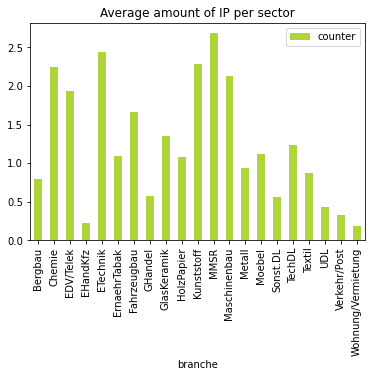

In [8]:
#Start van data manipulatie om linregres uit te voeren
linregresdata = dataSet.filter(items=['um', 'umneu','branche', 'schutz1', 'schutz2', 'schutz3', 'schutz4'
                                      , 'schutz5', 'schutz6', 'schutz7', 'fuebab'])
#verwijder alle NAN
linregresdata = linregresdata.dropna()

#Creëer een extra kolom met de aantallen IP per bedrijf
listToAdd = []
for index, row in linregresdata.iterrows():
    counter = 0
    if row['schutz1']=='ja':
        counter+=1
    if row['schutz2']=='ja':
        counter+=1
    if row['schutz3']=='ja':
        counter+=1
    if row['schutz4']=='ja':
        counter+=1
    if row['schutz5']=='ja':
        counter+=1
    if row['schutz6']=='ja':
        counter+=1
    if row['schutz7']=='ja':
            counter+=1
    listToAdd.append(counter)

linregresdata['counter']=listToAdd
linregresdata= linregresdata.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])

#Een descriptie van 'counter' over de hele markt
print(linregresdata['counter'].describe())
print('median: ', linregresdata['counter'].median())

#gemiddelde aantal ip per branche 
linanalysis = linregresdata.groupby('branche', as_index=False)['counter'].mean()
linanalysis.plot(kind='bar', x='branche', y= 'counter', color='#b0d43b')
plt.title("Average amount of IP per sector")
print(linanalysis)
plt.show()



                um      umneu       fuebab    counter
count    36.000000  36.000000    36.000000  36.000000
mean    282.854277   3.972222   129.227567   2.444444
std    1242.169072   2.501270   526.182228   2.500794
min       0.158610   0.000000     0.000000   0.000000
25%       3.507660   1.750000     0.549092   0.000000
50%      13.252666   5.000000     4.980078   1.500000
75%      30.929965   5.250000    17.077837   4.250000
max    7266.830000   7.000000  3040.410200   7.000000
TechData IP-counter median: 1.5
TechData Umneu median: 5.0
                            OLS Regression Results                            
Dep. Variable:                  umneu   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.580
Date:                Wed, 13 May 2020   Prob (F-statistic):             0.0910
Time:                        19:49:25   Log-Likelihood:     

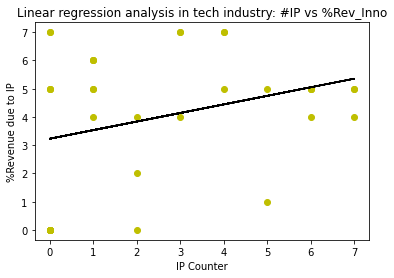

In [9]:
# Bestaat er een verband tss aantal IP en percentueel revenue door innovatie in de technische sector?
# TECHNISCHE SECTOR: ETechnik & TechDL

techData = linregresdata.loc[linregresdata['branche']=='ETechnik']
techData.append(linregresdata.loc[linregresdata['branche']=='TechDL'])

#Beschrijving van de data
print(techData.describe())
print('TechData IP-counter median:', techData['counter'].median())
print('TechData Umneu median:', techData['umneu'].median())

#lin regression plot
x = techData['counter'].reset_index()
x = x.drop(columns='index')
x = np.array(x).squeeze()

y = techData['umneu'].reset_index()
y = y.drop(columns='index')
y = np.array(y).squeeze()

coef = np.polyfit(x, y, 1)
polynomialFn_Tech = np.poly1d(coef)

plt.title('Linear regression analysis in tech industry: #IP vs %Rev_Inno')
pl.plot(x, y, 'yo', x, polynomialFn_Tech(x), '--k')
plt.xlabel('IP Counter')
plt.ylabel('%Revenue due to IP')
pl.show()

#Zet in de call hieronder jouw main variabele alsook de controle vars. door dit te doen indien 'um' als controle
# X = techData['counter', 'um']. De rest is gelijk, alsook het aanpassen van de Y waarde of dergelijke. Weet dat
# ik nu wel enkel heb verwezen naar de techData dataframe. Als je andere datasets hebt, die wat aangepast zijn zoals reeds 
# gedaan is in de code hieronder alsook hierboven, verwijs dan naar die dataframe ipv techData

X = techData[['counter', 'fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = techData['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
print_model = model.summary()
print(print_model)

#CONCLUSIE: GEEN LIN VERBAND IN TECHNISCHE SECTOR


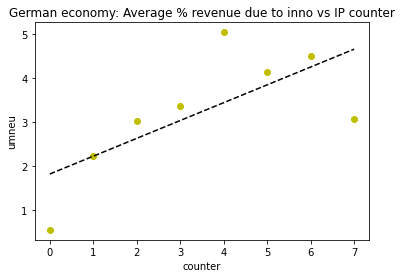

                            OLS Regression Results                            
Dep. Variable:                  umneu   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     348.2
Date:                Wed, 13 May 2020   Prob (F-statistic):           6.11e-67
Time:                        19:49:45   Log-Likelihood:                -2213.9
No. Observations:                1005   AIC:                             4432.
Df Residuals:                    1003   BIC:                             4442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7863      0.081      9.701      0.0

In [10]:
# Wat nu als we de hele markt bezien, is er dan een verband tss umneu en aantal IP?
# we nemen de gemiddeldes van umneu per #ip om het overzichtelijker te maken. De lin regressie analyse bestaat uit
# alle data. DE plot is versimpelt
generalData = linregresdata.groupby('counter', as_index=False)['umneu'].mean()
generalData.plot(kind= 'scatter', x='counter', y='umneu', color='#b0d43b')

x=generalData['counter']
y=generalData['umneu']

coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
plt.title('German economy: Average % revenue due to inno vs IP counter')
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.show()

#lin regr analyse
X = linregresdata[['counter']]
X = sm.add_constant(X)
Y = linregresdata['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
print_model = model.summary()
print(print_model)

#data description of lin model:
print(linregresdata['counter'].describe())
print('IP-counter median:', linregresdata['counter'].median())
print(linregresdata['umneu'].describe())
print('Umneu median:', linregresdata['umneu'].median())



In [11]:
print(dataSet['branche'].value_counts())




TechDL                190
Verkehr/Post          176
GHandel               156
Sonst.DL              152
Maschinenbau          138
Metall                131
Bank/Vers             118
EHandKfz              101
UDL                    86
HolzPapier             85
Wohnung/Vermietung     83
ETechnik               78
Kunststoff             69
EDV/Telek              69
ErnaehrTabak           63
Chemie                 61
MMSR                   57
Textil                 57
GlasKeramik            41
Fahrzeugbau            35
Bergbau                31
Moebel                 23
Name: branche, dtype: int64


              um  umneu schutz1       fuebab
1409      0.0000    7.0      ja     0.000000
276       0.0000    8.0      ja     1.634671
1757      0.0000    8.0      ja     0.958456
826       0.0000    7.0      ja     0.000000
897       0.0000    8.0      ja     3.612716
...          ...    ...     ...          ...
371    5608.2803    0.0      ja    75.724266
724    5620.2954    0.0      ja    75.519930
247    7266.8300    5.0      ja   989.046750
1731  12204.1730    3.0      ja  6141.282000
1063  12907.8730    6.0      ja  3997.493200

[316 rows x 4 columns]
count      316.000000
mean       297.668037
std       1297.836320
min          0.000000
25%          2.862659
50%         16.205432
75%         71.352991
max      12907.873000
Name: um, dtype: float64
Um median:  16.205432000000002
count    316.000000
mean       3.395570
std        2.929626
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max        8.000000
Name: umneu, dtype: float64
Umneu median:  3

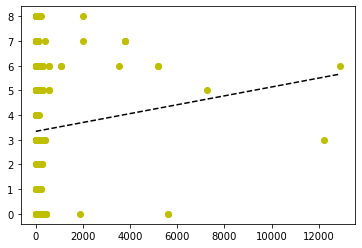

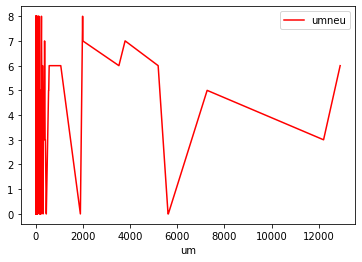

In [11]:
# Bestaat er een verband tussen de totale revenue van een bedrijf, met de revenue door innovatieve producten?

df = dataSet.filter(items=['um', 'umneu', 'schutz1', 'fuebab'])

dfSchutz1IPTrue = df.loc[df['schutz1']=='ja']

dfSchutz1IPTrue = dfSchutz1IPTrue.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])

dfSchutz1IPTrue['umneu'].fillna(0, inplace=True)
dfSchutz1IPTrue['um'].fillna(0, inplace=True)
dfSchutz1IPTrue['fuebab'].fillna(0, inplace=True)
dfSchutz1IPTrue = dfSchutz1IPTrue.sort_values(by=['um'], ascending=True)
print(dfSchutz1IPTrue)


#beschrijf de keyvar
print(dfSchutz1IPTrue['um'].describe())
print('Um median: ', dfSchutz1IPTrue['um'].median())
print(dfSchutz1IPTrue['umneu'].describe())
print('Umneu median: ', dfSchutz1IPTrue['umneu'].median())

#Plot de grafiek
x = dfSchutz1IPTrue['um']
y = dfSchutz1IPTrue['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
dfSchutz1IPTrue.plot(kind='line', x='um', y= 'umneu', color='red')
#Je ziet duidelijk nog niet echt een verband tss revenue en percentueel rev 
#door innovatie. We zullen dus per branche moeten zien hoeveel percentueel innovatie
#bijdraagt per branche.
plt.show()

# Check lineair model, met controle variabele aantal personeel in RND
X = dfSchutz1IPTrue[['um', 'fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = dfSchutz1IPTrue['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
print_model = model.summary()
print(print_model)



                            OLS Regression Results                            
Dep. Variable:                  umneu   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     17.24
Date:                Wed, 13 May 2020   Prob (F-statistic):           9.55e-08
Time:                        19:50:13   Log-Likelihood:                -624.21
No. Observations:                 257   AIC:                             1254.
Df Residuals:                     254   BIC:                             1265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4503      0.224     10.945      0.0

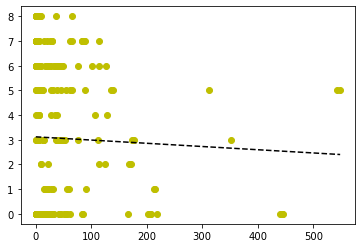

In [12]:
#Wat nu in kleine bedrijven?
smallBusinesses = dfSchutz1IPTrue.loc[dfSchutz1IPTrue['fuebab']<30]
smallBusinesses = smallBusinesses.loc[smallBusinesses['um']<3000]#de uitschieter verwijderen.
X = smallBusinesses[['um', 'fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = smallBusinesses['umneu']
model = sm.OLS(Y, X).fit()
predSmallBus = model.predict(X)
print_model = model.summary()
print(print_model)

#Er is dus geen lin verband tussen de revenue van een bedrijf en zijn revenue door innovatie.

#create plot of the small businesses
x = smallBusinesses['um']
y = smallBusinesses['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
plt.show()

               branche     umneu
0            Bank/Vers  7.000000
1              Bergbau  0.666667
2               Chemie  4.058824
3            EDV/Telek  4.000000
4             EHandKfz  4.000000
5             ETechnik  4.923077
6         ErnaehrTabak  3.000000
7          Fahrzeugbau  5.071429
8              GHandel  2.733333
9          GlasKeramik  3.600000
10          HolzPapier  3.750000
11          Kunststoff  3.526316
12                MMSR  4.833333
13        Maschinenbau  4.500000
14              Metall  4.300000
15              Moebel  3.000000
16            Sonst.DL  0.000000
17              TechDL  5.093750
18              Textil  1.500000
19                 UDL  6.000000
20        Verkehr/Post       NaN
21  Wohnung/Vermietung  0.000000
            umneu       fuebab
count  254.000000   267.000000
mean     4.224409   119.153284
std      2.677832   595.151208
min      0.000000     0.000000
25%      2.000000     1.563010
50%      5.000000     6.090768
75%      6.000000    23.

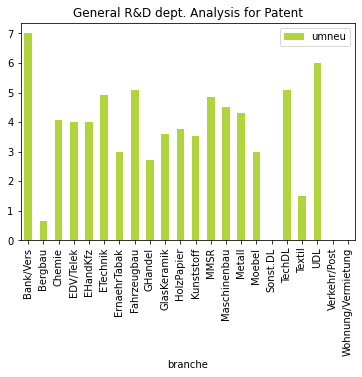

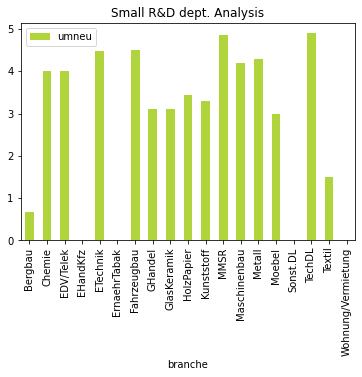

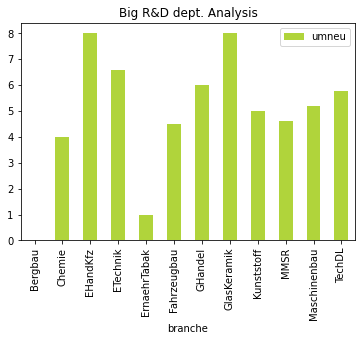

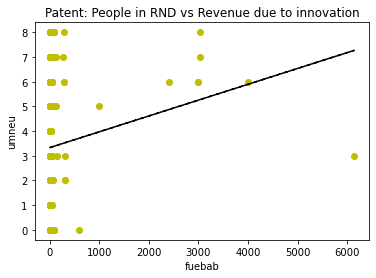

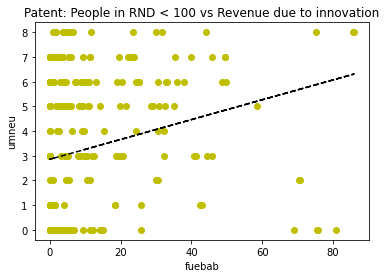

In [15]:
'''Stappenplan percentueel te werk gaan: 
    1. Filter op basis van ip
    2. Maak van de percentages rev door inno een numerieke voorstelling zoals 
    eerder al gedaan
    3. Per branche het gemiddelde tonen aan percentages
    
'''
# Eens in diepte uitwerken hoe het zit voor bedrijven met een patent.
# filter op alle bedrijven met een patent en check hun % aan revenue door innovatieve prodcuten
dfCommon = dataSet.filter(items=['branche', 'umneu', 'schutz1', 'fuebab'])
dfCommon = dfCommon.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'], 
                                          [0,1,2,3,4,5,6,7,8])
dfCommon = dfCommon.loc[dfCommon['schutz1']=='ja']
dfCommonPat = dfCommon
dfCommon['branche'].unique()
patentAnalysis = dfCommon.groupby('branche', as_index=False)['umneu'].mean()
print(patentAnalysis)
patentAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("General R&D dept. Analysis for Patent")
plt.show()

# Beschrijf de data
print(dfCommon.describe())
print('Fuebab median: ',dfCommon['fuebab'].median())
print('Umneu median: ',dfCommon['umneu'].median())
list = []
for item, frame in dataSet['schutz1'].iteritems():
    if frame=='ja':
        list.append(1)
    elif frame=='nein':
        list.append(0)
print('Median of schutz1: ', stat.median(list))


#Now take the people working in RND into consideration
#dfCommonPat = dfCommonPat['fuebab'].fillna(0, inplace=True)
print(dfCommonPat)

dfCommonPatBig = dfCommonPat.loc[dfCommonPat['fuebab']>30]
dfCommonPatSmall = dfCommonPat.loc[dfCommonPat['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonPatSmall.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonPatBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis")
plt.show()

#Check for lin relation between revenue due to inno with RND personel
dfCommonPat['fuebab'].fillna(0, inplace=True)
dfCommonPat['umneu'].fillna(0, inplace=True)
X = dfCommon[['fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = dfCommon['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression
x = dfCommonPat['fuebab']
y = dfCommonPat['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Patent: People in RND vs Revenue due to innovation')
plt.show()

#Plot the lin regression for companies with under 100 working in RND
dfCommonPat = dfCommonPat.loc[dfCommonPat['fuebab']<=100]
x = dfCommonPat['fuebab']
y = dfCommonPat['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Patent: People in RND < 100 vs Revenue due to innovation')
plt.show()



               branche     umneu
0              Bergbau  0.000000
1               Chemie  2.000000
2            EDV/Telek  5.500000
3             EHandKfz  0.000000
4             ETechnik  4.538462
5         ErnaehrTabak  2.333333
6          Fahrzeugbau  5.800000
7              GHandel  2.842105
8          GlasKeramik  3.600000
9           HolzPapier  3.250000
10          Kunststoff  3.210526
11                MMSR  4.363636
12        Maschinenbau  3.541667
13              Metall  3.461538
14              Moebel  3.000000
15            Sonst.DL  1.666667
16              TechDL  4.611111
17              Textil  2.400000
18                 UDL  8.000000
19        Verkehr/Post  5.333333
20  Wohnung/Vermietung  0.000000
            umneu       fuebab
count  176.000000   176.000000
mean     3.590909   125.193151
std      2.765652   655.580538
min      0.000000     0.000000
25%      0.000000     0.000000
50%      3.000000     3.799323
75%      6.000000    12.813992
max      8.000000  6141.28

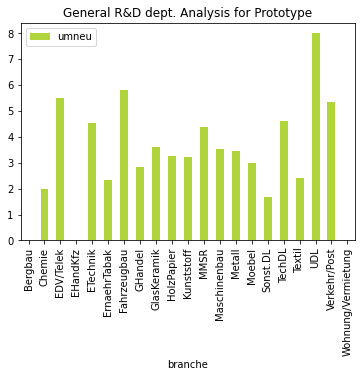

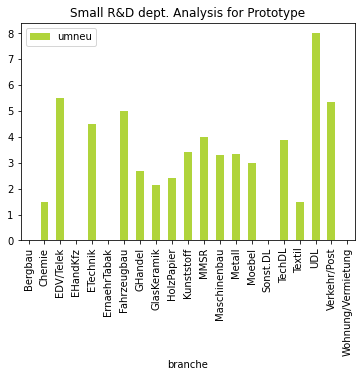

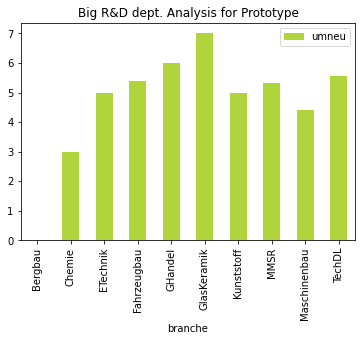

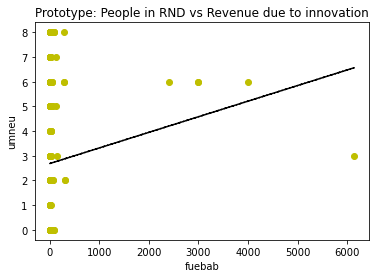

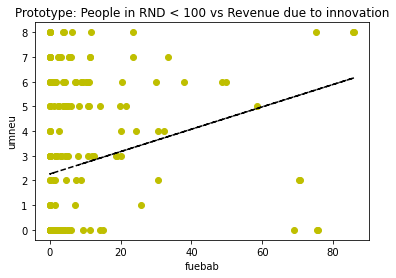

In [17]:
#Prototype

#filter op alle bedrijven met een prototype IP en check hun % aan revenue door innovatieve prodcuten
dfCommon2 = dataSet.filter(items=['branche', 'umneu', 'schutz2', 'fuebab'])
dfCommon2 = dfCommon2.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])

dfCommon2 = dfCommon2.loc[dfCommon2['schutz2']=='ja']
dfCommonProt = dfCommon2
dfCommon2['branche'].unique()
prototypeAnalysis = dfCommon2.groupby('branche', as_index=False)['umneu'].mean()
print(prototypeAnalysis)
prototypeAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("General R&D dept. Analysis for Prototype")
plt.show()

# Beschrijf de data
print(dfCommon2.describe())
print('Fuebab median: ',dfCommon2['fuebab'].median())
print('Umneu median: ',dfCommon2['umneu'].median())
list = []
for item, frame in dataSet['schutz2'].iteritems():
    if frame=='ja':
        list.append(1)
    elif frame=='nein':
        list.append(0)
print('Median of schutz2: ', stat.median(list))

#Now take the people working in RND into consideration
#dfCommonPat = dfCommonProt['fuebab'].fillna(0, inplace=True)
print(dfCommonProt)

dfCommonProtBig = dfCommonProt.loc[dfCommonProt['fuebab']>30]
dfCommonProtSmall = dfCommonProt.loc[dfCommonProt['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonProtSmall.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis for Prototype")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonProtBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis for Prototype")
plt.show()

#Check for lin relation between revenue due to inno witrh RND personel
dfCommonProt['fuebab'].fillna(0, inplace=True)
dfCommonProt['umneu'].fillna(0, inplace=True)
X = dfCommonProt[['fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = dfCommonProt['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression
x = dfCommonProt['fuebab']
y = dfCommonProt['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Prototype: People in RND vs Revenue due to innovation')
plt.show()

#Plot the lin regression for companies with under 100 working in RND
dfCommonProt = dfCommonProt.loc[dfCommonProt['fuebab']<=100]
x = dfCommonProt['fuebab']
y = dfCommonProt['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Prototype: People in RND < 100 vs Revenue due to innovation')
plt.show()




               branche     umneu
0            Bank/Vers  6.000000
1              Bergbau  2.800000
2               Chemie  2.705882
3            EDV/Telek  6.000000
4             EHandKfz  5.000000
5             ETechnik  5.000000
6         ErnaehrTabak  2.888889
7          Fahrzeugbau  5.545455
8              GHandel  2.388889
9          GlasKeramik  3.833333
10          HolzPapier  2.300000
11          Kunststoff  3.000000
12                MMSR  4.500000
13        Maschinenbau  4.526316
14              Metall  3.833333
15              Moebel  4.000000
16            Sonst.DL  1.900000
17              TechDL  4.428571
18              Textil  1.500000
19                 UDL  7.500000
20        Verkehr/Post  3.200000
21  Wohnung/Vermietung  5.000000
            umneu       fuebab
count  201.000000   200.000000
mean     3.746269   126.369305
std      2.738667   649.635124
min      0.000000     0.000000
25%      1.000000     0.000000
50%      4.000000     3.450881
75%      6.000000    18.

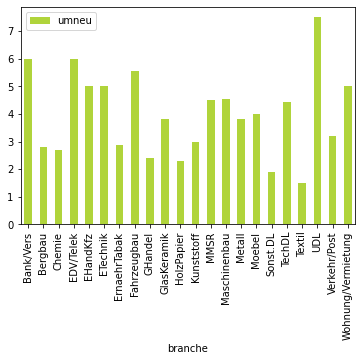

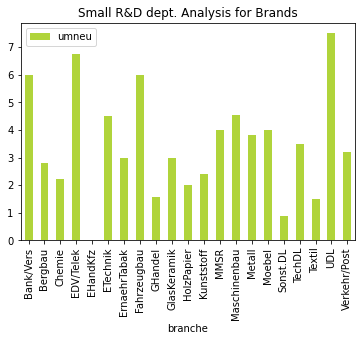

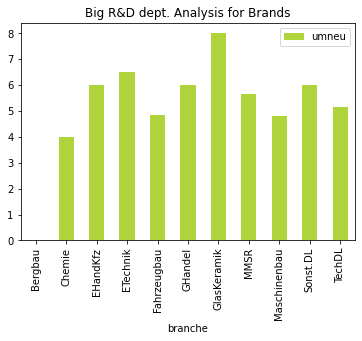

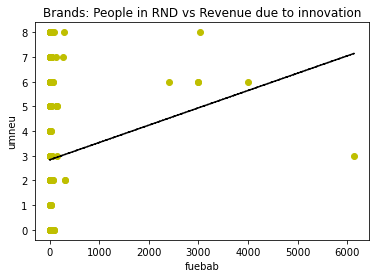

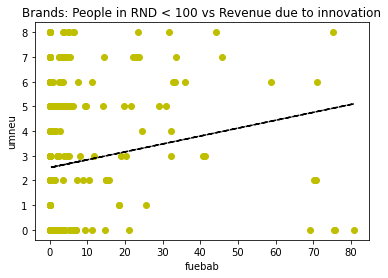

In [18]:

#Brands

#filter op alle bedrijven met een brands IP en check hun % aan revenue door innovatieve prodcuten
dfCommon3 = dataSet.filter(items=['branche', 'umneu', 'schutz3', 'fuebab'])
dfCommon3 = dfCommon3.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon3 = dfCommon3.loc[dfCommon3['schutz3']=='ja']
dfCommonBrands = dfCommon3
dfCommon3['branche'].unique()
brandsAnalysis = dfCommon3.groupby('branche', as_index=False)['umneu'].mean()
print(brandsAnalysis)
brandsAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

# Beschrijf de data
print(dfCommon3.describe())
print('Fuebab median: ',dfCommon3['fuebab'].median())
print('Umneu median: ',dfCommon3['umneu'].median())
list = []
for item, frame in dataSet['schutz3'].iteritems():
    if frame=='ja':
        list.append(1)
    elif frame=='nein':
        list.append(0)
print('Median of schutz3: ', stat.median(list))

#Now take the people working in RND into consideration
#dfCommonPat = dfCommonProt['fuebab'].fillna(0, inplace=True)
print(dfCommonBrands)

dfCommonBrandsBig = dfCommonBrands.loc[dfCommonBrands['fuebab']>30]
dfCommonBrandsSmall = dfCommonBrands.loc[dfCommonBrands['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonBrandsSmall.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis for Brands")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonBrandsBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis for Brands")
plt.show()

#Check for lin relation between revenue due to inno witrh RND personel
dfCommonBrands['fuebab'].fillna(0, inplace=True)
dfCommonBrands['umneu'].fillna(0, inplace=True)
X = dfCommonBrands[['fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = dfCommonBrands['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression+
x = dfCommonBrands['fuebab']
y = dfCommonBrands['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Brands: People in RND vs Revenue due to innovation')
plt.show()

#Plot the lin regression for companies with under 100 working in RND
dfCommonBrands = dfCommonBrands.loc[dfCommonBrands['fuebab']<=100]
x = dfCommonBrands['fuebab']
y = dfCommonBrands['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Brands: People in RND < 100 vs Revenue due to innovation')
plt.show()


               branche     umneu
0            Bank/Vers       NaN
1              Bergbau  0.000000
2               Chemie  2.000000
3            EDV/Telek  5.769231
4             EHandKfz       NaN
5             ETechnik  4.750000
6         ErnaehrTabak  5.500000
7          Fahrzeugbau  6.500000
8              GHandel  2.625000
9          GlasKeramik  5.000000
10          HolzPapier  2.000000
11          Kunststoff  1.750000
12                MMSR  4.400000
13        Maschinenbau  2.833333
14              Metall  5.500000
15              Moebel       NaN
16            Sonst.DL  0.333333
17              TechDL  4.166667
18              Textil  2.250000
19                 UDL  6.666667
20        Verkehr/Post  8.000000
21  Wohnung/Vermietung       NaN
           umneu       fuebab
count  84.000000    79.000000
mean    3.869048   196.808683
std     2.865582   865.681928
min     0.000000     0.000000
25%     0.750000     0.000000
50%     5.000000     2.340171
75%     6.250000    11.550938
m

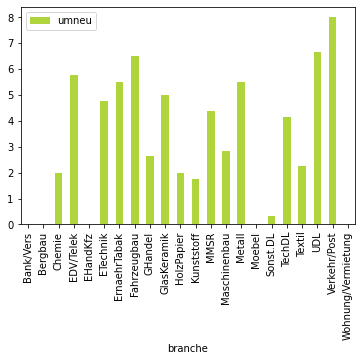

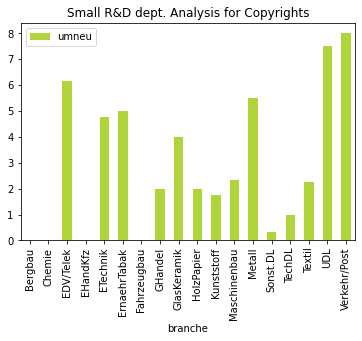

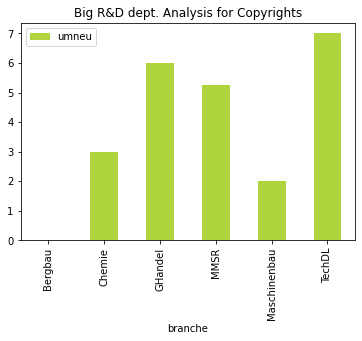

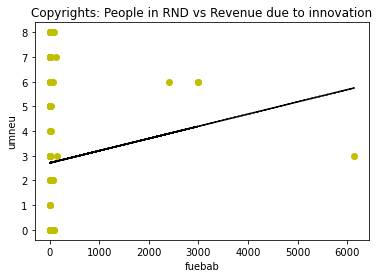

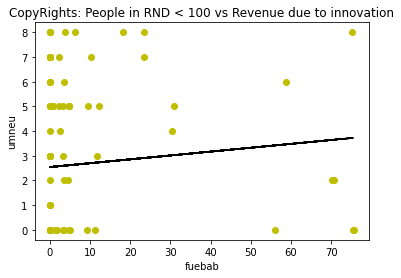

In [19]:

#Copyrights

#filter op alle bedrijven met een copyrights en check hun % aan revenue door innovatieve prodcuten
dfCommon4 = dataSet.filter(items=['branche', 'umneu', 'schutz4', 'fuebab'])
dfCommon4 = dfCommon4.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon4 = dfCommon4.loc[dfCommon4['schutz4']=='ja']
dfCommonCopyR = dfCommon4
dfCommon4['branche'].unique()
copyrightsAnalysis = dfCommon4.groupby('branche', as_index=False)['umneu'].mean()
print(copyrightsAnalysis)
copyrightsAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

# Beschrijf de data
print(dfCommon4.describe())
print('Fuebab median: ',dfCommon4['fuebab'].median())
print('Umneu median: ',dfCommon['umneu'].median())
list = []
for item, frame in dataSet['schutz4'].iteritems():
    if frame=='ja':
        list.append(1)
    elif frame=='nein':
        list.append(0)
print('Median of schutz4: ', stat.median(list))

#Now take the people working in RND into consideration
#dfCommonPat = dfCommonProt['fuebab'].fillna(0, inplace=True)
print(dfCommonCopyR)

dfCommonCopyRBig = dfCommonCopyR.loc[dfCommonCopyR['fuebab']>30]
dfCommonCopyRSmall = dfCommonCopyR.loc[dfCommonCopyR['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonCopyRSmall.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis for Copyrights")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonCopyRBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis for Copyrights")
plt.show()

#Check for lin relation between revenue due to inno witrh RND personel
dfCommonCopyR['fuebab'].fillna(0, inplace=True)
dfCommonCopyR['umneu'].fillna(0, inplace=True)
X = dfCommonCopyR[['fuebab']] #fuebab is een controle var nu.
X = sm.add_constant(X)
Y = dfCommonCopyR['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression+
x = dfCommonCopyR['fuebab']
y = dfCommonCopyR['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Copyrights: People in RND vs Revenue due to innovation')
plt.show()

#Plot the lin regression for companies with under 100 working in RND
dfCommonCopyR = dfCommonCopyR.loc[dfCommonCopyR['fuebab']<=100]
x = dfCommonCopyR['fuebab']
y = dfCommonCopyR['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('CopyRights: People in RND < 100 vs Revenue due to innovation')
plt.show()


               branche     umneu
0            Bank/Vers  3.000000
1              Bergbau  0.666667
2               Chemie  3.272727
3            EDV/Telek  5.571429
4             EHandKfz  4.250000
5             ETechnik  5.000000
6         ErnaehrTabak  3.200000
7          Fahrzeugbau  5.076923
8              GHandel  3.400000
9          GlasKeramik  5.000000
10          HolzPapier  4.111111
11          Kunststoff  3.666667
12                MMSR  4.900000
13        Maschinenbau  4.000000
14              Metall  3.333333
15              Moebel  2.600000
16            Sonst.DL  2.235294
17              TechDL  5.000000
18              Textil  3.285714
19                 UDL  3.750000
20        Verkehr/Post  2.375000
21  Wohnung/Vermietung  4.000000
            umneu       fuebab
count  348.000000   343.000000
mean     4.011494    89.018582
std      2.625498   526.266301
min      0.000000     0.000000
25%      2.000000     0.414780
50%      4.000000     3.647742
75%      6.000000    14.

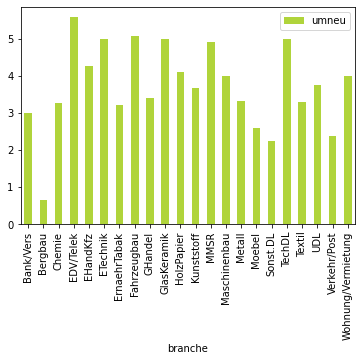

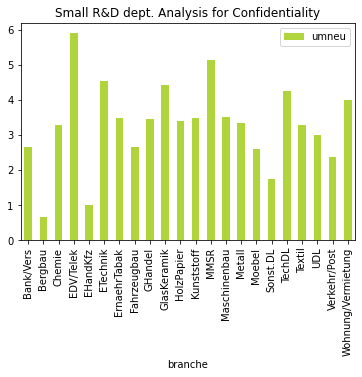

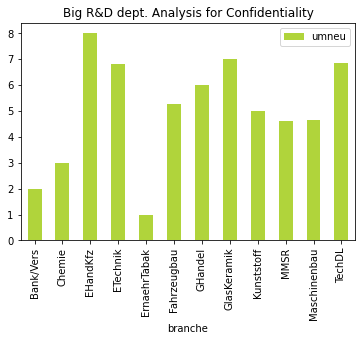

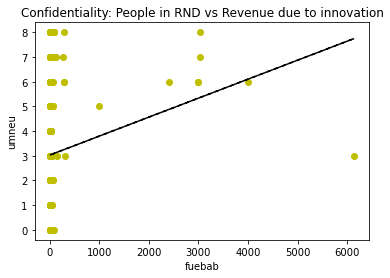

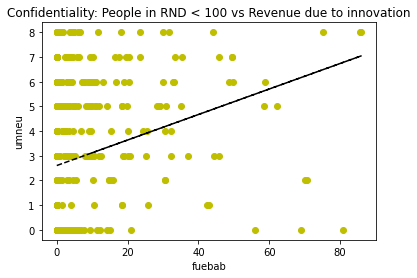

In [20]:

#Confidentiality

#filter op alle bedrijven met een confidentiality en check hun % aan revenue door innovatieve prodcuten

dfCommon5 = dataSet.filter(items=['branche', 'umneu', 'schutz5', 'fuebab'])
dfCommon5 = dfCommon5.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon5 = dfCommon5.loc[dfCommon5['schutz5']=='ja']
dfCommonConf = dfCommon5
dfCommon5['branche'].unique()
confidentialityAnalysis = dfCommon5.groupby('branche', as_index=False)['umneu'].mean()
print(confidentialityAnalysis)
confidentialityAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

# Beschrijf de data
print(dfCommon5.describe())
print('Fuebab median: ',dfCommon5['fuebab'].median())
print('Umneu median: ',dfCommon5['umneu'].median())
list = []
for item, frame in dataSet['schutz5'].iteritems():
    if frame=='ja':
        list.append(1)
    elif frame=='nein':
        list.append(0)
print('Median of schutz5: ', stat.median(list))

#Now take the people working in RND into consideration
#dfCommonPat = dfCommonProt['fuebab'].fillna(0, inplace=True)
print(dfCommonConf)

dfCommonConfBig = dfCommonConf.loc[dfCommonConf['fuebab']>30]
dfCommonConfSmall = dfCommonConf.loc[dfCommonConf['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonConfSmall.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis for Confidentiality")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonConfBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis for Confidentiality")
plt.show()

#Check for lin relation between revenue due to inno witrh RND personel
dfCommonConf['fuebab'].fillna(0, inplace=True)
dfCommonConf['umneu'].fillna(0, inplace=True)
X = dfCommonConf['fuebab']
X = sm.add_constant(X)
Y = dfCommonConf['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression+
x = dfCommonConf['fuebab']
y = dfCommonConf['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Confidentiality: People in RND vs Revenue due to innovation')
plt.show()

#Plot the lin regression for companies with under 100 working in RND
dfCommonConf = dfCommonConf.loc[dfCommonConf['fuebab']<=100]
x = dfCommonConf['fuebab']
y = dfCommonConf['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Confidentiality: People in RND < 100 vs Revenue due to innovation')
plt.show()


               branche     umneu
0            Bank/Vers  2.857143
1              Bergbau  0.666667
2               Chemie  3.083333
3            EDV/Telek  5.055556
4             EHandKfz  4.666667
5             ETechnik  4.437500
6         ErnaehrTabak  4.200000
7          Fahrzeugbau  5.750000
8              GHandel  3.000000
9          GlasKeramik  4.200000
10          HolzPapier  3.857143
11          Kunststoff  3.588235
12                MMSR  4.789474
13        Maschinenbau  4.370370
14              Metall  3.400000
15            Sonst.DL  1.444444
16              TechDL  4.850000
17              Textil  0.000000
18                 UDL  4.444444
19        Verkehr/Post  2.714286
20  Wohnung/Vermietung  4.500000
            umneu       fuebab
count  222.000000   206.000000
mean     3.959459   124.890487
std      2.742852   643.145129
min      0.000000     0.000000
25%      1.000000     0.000000
50%      4.000000     3.541826
75%      6.000000    15.375694
max      8.000000  6141.28

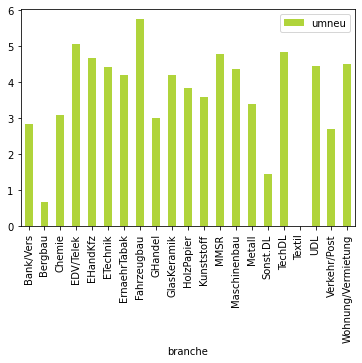

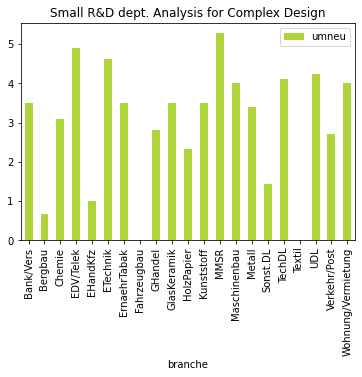

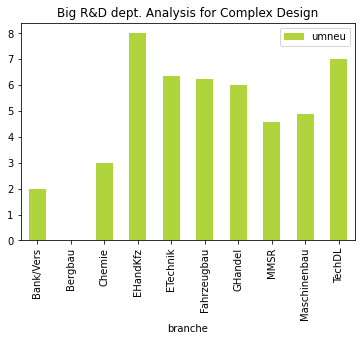

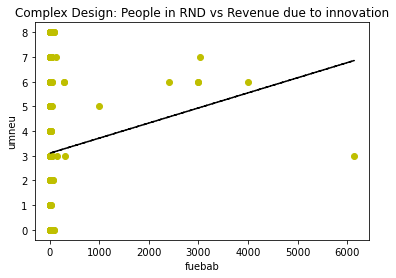

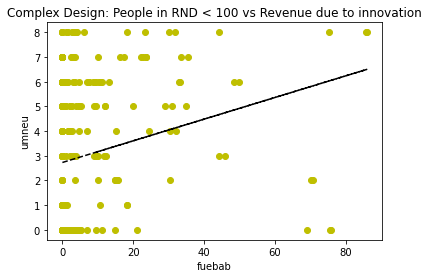

In [21]:

#Complex design

#filter op alle bedrijven met een complex design IP en check hun % aan revenue door innovatieve prodcuten

dfCommon6 = dataSet.filter(items=['branche', 'umneu', 'schutz6', 'fuebab'])
dfCommon6 = dfCommon6.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon6 = dfCommon6.loc[dfCommon6['schutz6']=='ja']
dfCommonComplexDes = dfCommon6
dfCommon6['branche'].unique()
complexdesignAnalysis = dfCommon6.groupby('branche', as_index=False)['umneu'].mean()
print(complexdesignAnalysis)
complexdesignAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

# Beschrijf de data
print(dfCommon6.describe())
print('Fuebab median: ',dfCommon6['fuebab'].median())
print('Umneu median: ',dfCommon6['umneu'].median())
list = []
for item, frame in dataSet['schutz6'].iteritems():
    if frame=='ja':
        list.append(1)
    elif frame=='nein':
        list.append(0)
print('Median of schutz6: ', stat.median(list))

#Now take the people working in RND into consideration
#dfCommonPat = dfCommonProt['fuebab'].fillna(0, inplace=True)
print(dfCommonComplexDes)

dfCommonComplexDesBig = dfCommonComplexDes.loc[dfCommonComplexDes['fuebab']>30]
dfCommonComplexDesSmall = dfCommonComplexDes.loc[dfCommonComplexDes['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonComplexDesSmall.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis for Complex Design")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonComplexDesBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis for Complex Design")
plt.show()

#Check for lin relation between revenue due to inno witrh RND personel
dfCommonComplexDes['fuebab'].fillna(0, inplace=True)
dfCommonComplexDes['umneu'].fillna(0, inplace=True)
X = dfCommonComplexDes['fuebab']
X = sm.add_constant(X)
Y = dfCommonComplexDes['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression+
x = dfCommonComplexDes['fuebab']
y = dfCommonComplexDes['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Complex Design: People in RND vs Revenue due to innovation')
plt.show()

#Plot the lin regression for companies with under 100 working in RND
dfCommonComplexDes = dfCommonComplexDes.loc[dfCommonComplexDes['fuebab']<=100]
x = dfCommonComplexDes['fuebab']
y = dfCommonComplexDes['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Complex Design: People in RND < 100 vs Revenue due to innovation')
plt.show()


#brief description of the data
print(complexdesignAnalysis.describe())
print('median: ', complexdesignAnalysis.median())


               branche     umneu
0            Bank/Vers  3.466667
1              Bergbau  0.666667
2               Chemie  3.600000
3            EDV/Telek  4.750000
4             EHandKfz  4.777778
5             ETechnik  4.648649
6         ErnaehrTabak  2.214286
7          Fahrzeugbau  5.125000
8              GHandel  2.923077
9          GlasKeramik  4.142857
10          HolzPapier  4.285714
11          Kunststoff  3.576923
12                MMSR  4.870968
13        Maschinenbau  3.784615
14              Metall  3.454545
15              Moebel  3.400000
16            Sonst.DL  2.578947
17              TechDL  5.228571
18              Textil  2.555556
19                 UDL  4.785714
20        Verkehr/Post  2.333333
21  Wohnung/Vermietung  1.000000
            umneu       fuebab
count  278.000000   278.000000
mean     3.161871    92.544749
std      2.921176   555.989646
min      0.000000     0.000000
25%      0.000000     0.000000
50%      3.000000     1.233595
75%      6.000000     9.

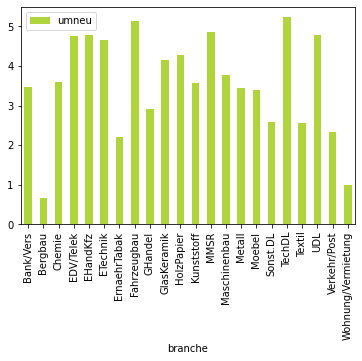

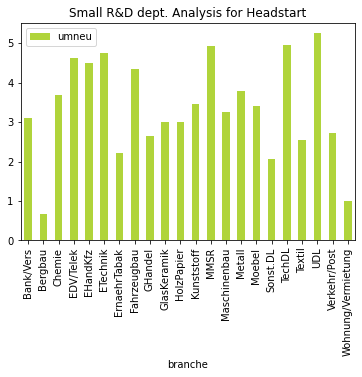

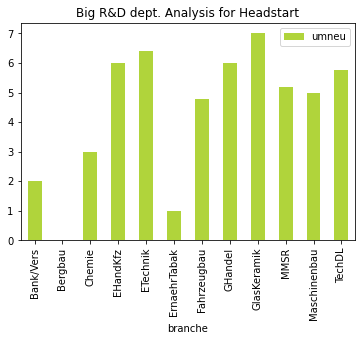

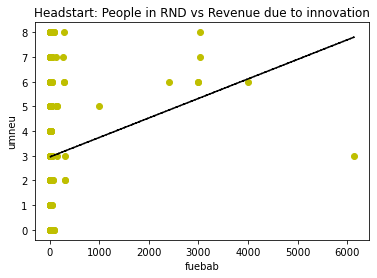

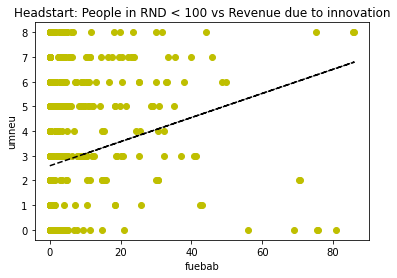

In [22]:

#advantage due to headstart

#filter op alle bedrijven met een advantage due to headstart IP en check hun % aan revenue door innovatieve prodcuten
dfCommon7 = dataSet.filter(items=['branche', 'umneu', 'schutz7', 'fuebab'])
dfCommon7 = dfCommon7.replace(['x=0','0<x<5','5<=x<10','10<=x<15','15<=x<20',
                                           '20<=x<30','30<=x<50', '50<=x<75', '75<=x<=100'],
                                          [0,1,2,3,4,5,6,7,8])
dfCommon7 = dfCommon7.loc[dfCommon7['schutz7']=='ja']
dfCommonHeadSt = dfCommon7
dfCommon7['branche'].unique()
advantageduetoheadstartAnalysis = dfCommon7.groupby('branche', as_index=False)['umneu'].mean()
print(advantageduetoheadstartAnalysis)
advantageduetoheadstartAnalysis.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')

# Beschrijf de data
print(dfCommon6.describe())
print('Fuebab median: ',dfCommon6['fuebab'].median())
print('Umneu median: ',dfCommon6['umneu'].median())
list = []
for item, frame in dataSet['schutz6'].iteritems():
    if frame=='ja':
        list.append(1)
    elif frame=='nein':
        list.append(0)
print('Median of schutz6: ', stat.median(list))

#Now take the people working in RND into consideration
print(dfCommonHeadSt)

dfCommonHeadStBig = dfCommonHeadSt.loc[dfCommonHeadSt['fuebab']>30]
dfCommonHeadStSmall = dfCommonHeadSt.loc[dfCommonHeadSt['fuebab']<30]

#small RND dept
patentAnalysisSmallBus = dfCommonHeadStSmall.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisSmallBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Small R&D dept. Analysis for Headstart")
plt.show()

#30 employees or more in RND
patentAnalysisBigBus = dfCommonHeadStBig.groupby('branche', as_index=False)['umneu'].mean()
patentAnalysisBigBus.plot(kind='bar', x='branche', y= 'umneu', color='#b0d43b')
plt.title("Big R&D dept. Analysis for Headstart")
plt.show()

#Check for lin relation between revenue due to inno witrh RND personel
dfCommonHeadSt['fuebab'].fillna(0, inplace=True)
dfCommonHeadSt['umneu'].fillna(0, inplace=True)
X = dfCommonHeadSt['fuebab']
X = sm.add_constant(X)
Y = dfCommonHeadSt['umneu']
model = sm.OLS(Y, X).fit()
pred = model.predict(X)
#P<0,05 dus er is een lin verband
print_model = model.summary()
print(print_model)

#Plot the lin regression+
x = dfCommonHeadSt['fuebab']
y = dfCommonHeadSt['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Headstart: People in RND vs Revenue due to innovation')
plt.show()

#Plot the lin regression for companies with under 100 working in RND
dfCommonHeadSt = dfCommonHeadSt.loc[dfCommonHeadSt['fuebab']<=100]
x = dfCommonHeadSt['fuebab']
y = dfCommonHeadSt['umneu']
coef = np.polyfit(x, y, 1)
polynomialFn = np.poly1d(coef)
pl.plot(x, y, 'yo', x, polynomialFn(x), '--k')
pl.xlabel('fuebab')
pl.ylabel('umneu')
plt.title('Headstart: People in RND < 100 vs Revenue due to innovation')
plt.show()

#brief description of the data
print(advantageduetoheadstartAnalysis.describe())
print('median: ', advantageduetoheadstartAnalysis.median())